# Data Science Workflow

This is a notebook for testing all of the functions to go through an entire data science workflow of running NLP on chosen subreddits.

**Future**
- DF functions should be removed from workflow and imported using a class.
- Multiple example DS outcomes would be nice.

---

In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import wordcloud
import time
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
import databases
import dataloader

In [7]:
# subreddit_list = ['css', 'html', 'javascript', 'php', 'perl', 'java', 'datascience', 'machinelearning', 'etl', 'python']

In [8]:
subreddit_list = ['datascience','machinelearning']

In [9]:
df = dataloader.data_selector(subreddit_list, 'sqlite')

Connection to SQLite DB successful


In [10]:
subreddit_list = [sub for sub in subreddit_list if sub in df.subreddit.unique()]

In [11]:
subreddit_list

['datascience', 'machinelearning']

In [12]:
df = dataloader.subreddit_encoder(df)

Subreddits and codes added: {'datascience': 0, 'machinelearning': 1}


In [13]:
df.sample(10)

,title,subreddit,date,sub_code
4128,Practicing Data Scientists: What are the 3 mos...,datascience,2020-03-10,0
707,How do voter data companies collect or match i...,datascience,2020-03-10,0
3484,[N] OpenAI Switches to PyTorch,machinelearning,2020-03-10,1
4202,Linear Regression strange mean absolute error ...,datascience,2020-03-10,0
3398,[P] Creating a stylized image using Transfer L...,machinelearning,2020-03-10,1
3983,What’s your tip for a new Data Analyst/Scienti...,datascience,2020-03-10,0
156,Numerical typographical error detection.,datascience,2020-03-10,0
4541,Good Front-End components for working with N-D...,datascience,2020-03-10,0
3453,[D] More elegant way to use Keras TensorBoard ...,machinelearning,2020-03-10,1
3384,[D] Application of neuro fuzzy networks in ML,machinelearning,2020-03-10,1


In [14]:
X = df['title']
y = df['sub_code']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [16]:
useless_words = set(['using', 'help', 'new', 'data', 'science', 'machine', 'learning', 'use', 'need'])

custom_stop_words = ENGLISH_STOP_WORDS.union(subreddit_list, useless_words)

In [17]:
pipe = Pipeline([('count_vec', CountVectorizer()),(('lr', LogisticRegression()))])

In [18]:
pipe_params = {
                'count_vec__max_features': [4000],
                'count_vec__max_df': [.3],
                'count_vec__ngram_range': [(1,2)],
                'count_vec__stop_words': [custom_stop_words],
                'count_vec__min_df': [3],
                'lr__penalty': ['l2'],
                'lr__C': [5]
                }

In [19]:
model = GridSearchCV(pipe, param_grid=pipe_params, cv=5, verbose=1, n_jobs=-1)

In [20]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('count_vec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                       

In [21]:
model.best_params_

{'count_vec__max_df': 0.3,
 'count_vec__max_features': 4000,
 'count_vec__min_df': 3,
 'count_vec__ngram_range': (1, 2),
 'count_vec__stop_words': frozenset({'a',
            'about',
            'above',
            'across',
            'after',
            'afterwards',
            'again',
            'against',
            'all',
            'almost',
            'alone',
            'along',
            'already',
            'also',
            'although',
            'always',
            'am',
            'among',
            'amongst',
            'amoungst',
            'amount',
            'an',
            'and',
            'another',
            'any',
            'anyhow',
            'anyone',
            'anything',
            'anyway',
            'anywhere',
            'are',
            'around',
            'as',
            'at',
            'back',
            'be',
            'became',
            'because',
            'become',
            'becomes',
    

In [22]:
print(f'Best Modeling Score: {model.best_score_}')

print(f'Train Score: {model.score(X_train, y_train)}')

print(f'Test Score: {model.score(X_test, y_test)}')

Best Modeling Score: 0.9125069856283728
Train Score: 0.9872942535373953
Test Score: 0.922943722943723


In [23]:
from grid_models import preprocessors, estimators

In [24]:
from pprint import pprint

In [25]:
pprint(preprocessors)

{'count_vec': {'abbr': 'count_vec',
               'name': 'CountVectorizer',
               'pipe_params': {'count_vec__max_df': [0.3, 0.4, 0.5],
                               'count_vec__max_features': [5000],
                               'count_vec__min_df': [4, 5, 6],
                               'count_vec__ngram_range': [(1, 2)],
                               'count_vec__stop_words': ['english']},
               'processor': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)},
 'tfidf': {'abbr': 'tfidf',
           'name': 'TfidVectorizer',
           'pipe_params': {'tfidf__max_features': [5000],
                   

In [26]:
pprint(estimators)

{'knn': {'abbr': 'knn',
         'estimator': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'),
         'name': 'K Nearest Neighbors',
         'pipe_params': {'knn__metric': ['manhattan'],
                         'knn__n_neighbors': [3, 5, 7]}},
 'lr': {'abbr': 'lr',
        'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False),
        'name': 'Logistic Regression',
        'pipe_params': {'lr__C': [0.01, 0.1, 1, 3],
                        'lr__penalty': ['l1', 'l2']}},
 'mnb': {'abbr': 'mnb',
         'estimator': MultinomialNB(alpha=1.0, class_prior=None, fit_prio

In [27]:
def compare_models(preprocessors=preprocessors, estimators=estimators, cv=5, verbose=1, n_jobs=-1):

    # Set up the dataframe          
    model_comparison_df = pd.DataFrame(columns=[
                                            'Preprocessor',
                                            'Estimator', 
                                            'Best Params', 
                                            'Best Train Score',
                                            'Best Test Score',
                                            'Variance'
                                           ])         

    # fit a model for each combo of preprocessor and estimator
    for est in estimators.values():
        for prep in preprocessors.values():
            pipe = Pipeline([(prep['abbr'], prep['processor']), (est['abbr'], est['estimator'])])
            pipe_params = dict()
            pipe_params.update(prep['pipe_params'])
            pipe_params.update(est['pipe_params'])
            model = GridSearchCV(pipe, param_grid=pipe_params, cv=cv, verbose=verbose, n_jobs=n_jobs)
            model.fit(X_train, y_train)
            train_score = model.score(X_train, y_train)
            test_score = model.score(X_test, y_test)

            # add the model result to the df
            model_comparison_df.loc[len(model_comparison_df)] = [
                                    prep['name'], 
                                    est['name'], 
                                    model.best_params_, 
                                    train_score,
                                    test_score,
                                    (train_score - test_score) / train_score * 100
                                  ]

    return model_comparison_df

In [28]:
compare_df = compare_models(cv=2)

Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 2 folds for each of 243 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:   48.1s finished


Fitting 2 folds for each of 27 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    6.3s finished


Fitting 2 folds for each of 27 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
/Users/chris/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    3.4s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.4s finished


Fitting 2 folds for each of 27 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.7s finished
/Users/chris/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits
Fitting 2 folds for each of 675 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
/Users/chris/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  1.8min finished


Fitting 2 folds for each of 75 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   18.1s finished


In [29]:
compare_df.sort_values(by='Best Test Score', ascending=False)

,Preprocessor,Estimator,Best Params,Best Train Score,Best Test Score,Variance
9,TfidVectorizer,Support Vector Classifier,"{'svc__C': 4, 'svc__degree': 1, 'svc__gamma': ...",0.995668,0.954113,-0.041556
4,CountVectorizer,K Nearest Neighbors,"{'count_vec__max_df': 0.3, 'count_vec__max_fea...",0.971701,0.948052,-0.023649
8,CountVectorizer,Support Vector Classifier,"{'count_vec__max_df': 0.4, 'count_vec__max_fea...",0.992781,0.944589,-0.048192
7,TfidVectorizer,Multinomial Bayes Classifier,"{'mnb__alpha': 0.1, 'mnb__fit_prior': False, '...",0.976032,0.938528,-0.037504
2,CountVectorizer,Random Forest,"{'count_vec__max_df': 0.3, 'count_vec__max_fea...",0.992203,0.937662,-0.054541
0,CountVectorizer,Logistic Regression,"{'count_vec__max_df': 0.4, 'count_vec__max_fea...",0.974011,0.929870,-0.044141
3,TfidVectorizer,Random Forest,"{'rf__max_depth': 200, 'rf__min_samples_leaf':...",0.998267,0.910823,-0.087445
1,TfidVectorizer,Logistic Regression,"{'lr__C': 3, 'lr__penalty': 'l2', 'tfidf__max_...",0.971412,0.907359,-0.064053
6,CountVectorizer,Multinomial Bayes Classifier,"{'count_vec__max_df': 0.4, 'count_vec__max_fea...",0.917990,0.824242,-0.093748
5,TfidVectorizer,K Nearest Neighbors,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.797863,0.792208,-0.005655


In [30]:
# model is GridSearchCV
# best_estimator is Pipeline
# named_steps is the steps in the pipeline
# count_vec is the FITTED 

features_data = model.best_estimator_.named_steps.count_vec.transform(X).toarray()
features_columns = model.best_estimator_.named_steps.count_vec.get_feature_names()
features_df = pd.DataFrame(data=features_data, columns=features_columns)

In [31]:
### CHECK ### does this function work with tfidf, or just count vec?
###HELP### display scale is out of proportion when only using 3 features, 2 columns if features below X value?
def plot_most_common(df, features_df, num_features=20, standardize=False, include_combined=False):
    '''
    Plots the most common features for each subreddit in the DataFrame
    
    Parameters:
    
    df: original DataFrame
    
    features_df: should be output from transformer on df
        
        Example:
        features_df = pd.DataFrame(
                                data={transformer}.transform(X).toarray(),
                                columns={transformer}.get_feature_names())
    
    num_features: number of most common features to plot for each subreddit
    
    standardize: put all of the plots on the same scale
    
    combined: include a plot of the most common features of all of the subreddits combined
    
    Returns:
    
    plots
    
    '''

    fig, ax = plt.subplots(ncols=1, 
                           nrows=len(subreddit_list) + int(1 if include_combined else 0), 
                           figsize=(15, num_features/1.5*len(subreddit_list)))

    for subplot_idx, sub in enumerate(subreddit_list):
        sub_features = features_df.loc[df['subreddit'] == sub]
        sub_top_words = sub_features.sum().sort_values(ascending=False).head(num_features)[::-1]
        sub_top_words.plot(kind='barh', ax=ax[subplot_idx])
        ax[subplot_idx].set_title(f'{num_features} Most Common Words for {sub.upper()}', fontsize=16)
        if standardize:
            max_occurence = features_df.sum().max()
            ax[subplot_idx].set_xlim(0,max_occurence)

    if include_combined:
        most_common = features_df.sum().sort_values(ascending=False).head(num_features)[::-1]
        most_common.plot(kind='barh', ax=ax[subplot_idx+1])
        ax[subplot_idx+1].set_title(f'{num_features} Most Common Words for {subreddit_list}')
        if standardize:
            max_occurence = features_df.sum().max()
            ax[subplot_idx+1].set_xlim(0,max_occurence)
    plt.tight_layout()

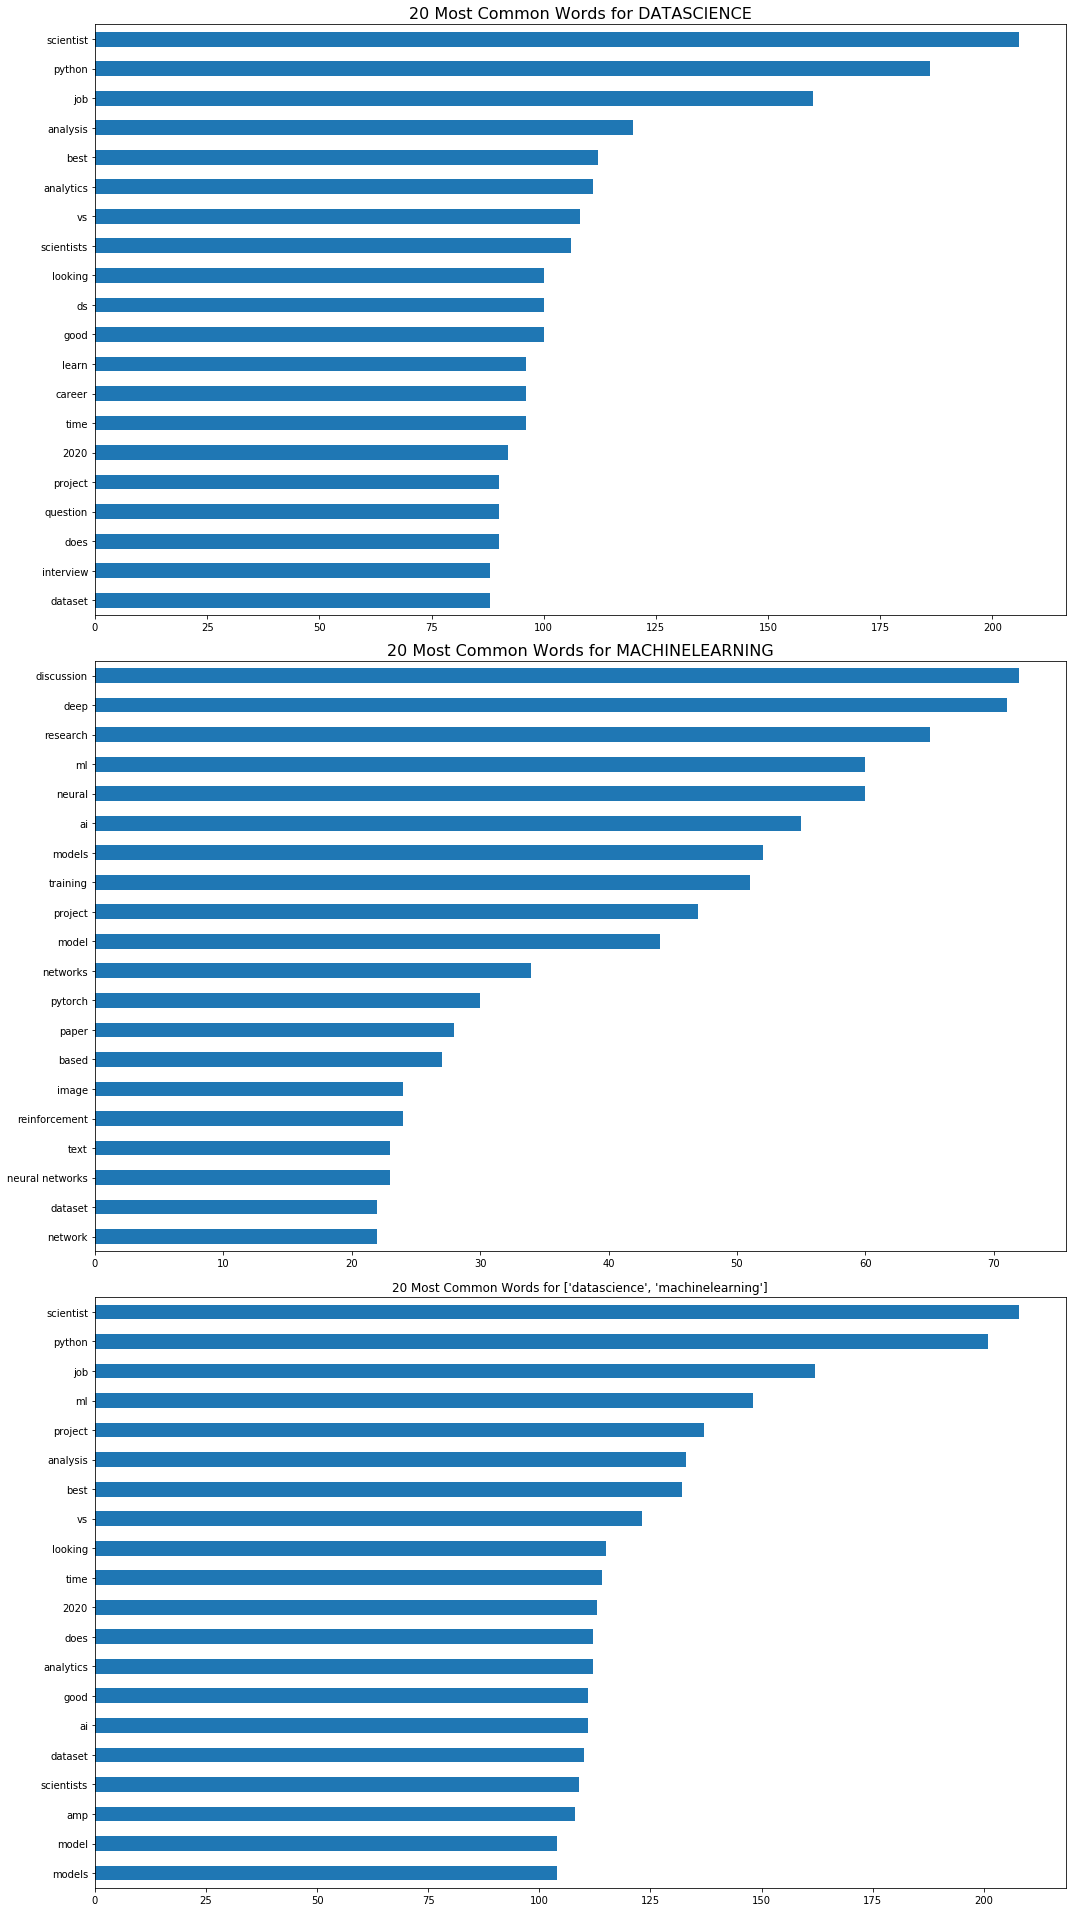

In [32]:
plot_most_common(df, features_df, num_features=20, include_combined=True)

## Feature Importance Coefficients

In [31]:
###HELP### I don't think this is working right
###HELP### coefficients don't make sense for the entire dataset, would need to do one for each thing

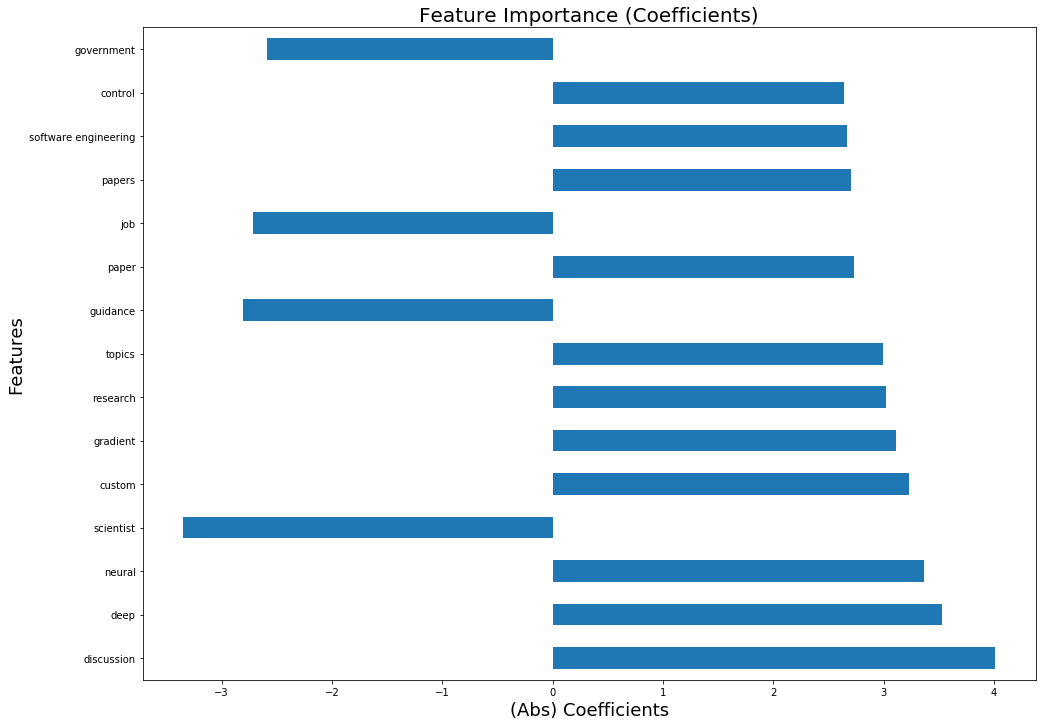

In [33]:
###NOTE### coefficients only for lr and etc etc etc...
###NOTE### coefficients only for two subreddits


# [-1][1] for last step (estimator)(instantiation)
# coef_[0]because I don't know why
coefs = model.best_estimator_.steps[-1][1].coef_[0]




plt.figure(figsize=(16, 12))
plt.title('Feature Importance (Coefficients)', fontsize=20)
plt.ylabel('Features', fontsize=18)
plt.xlabel('(Abs) Coefficients', fontsize=18)

coef_df = pd.DataFrame(data=[coefs], columns=features_columns).T
coef_df['abs_coef'] = coef_df[0].abs()
coef_df.sort_values('abs_coef', ascending=False)[0].head(15).plot(kind='barh');

# coef_kill = coef_df.sort_values('abs_coef', ascending=False)[0].head(500).index

# coef_kill


# my_stops.extend(coef_kill)

In [34]:
from itertools import combinations

In [35]:
def make_pairs(subreddit_list):
    '''
    Makes combination pairs of subreddits from subreddit_list
    '''
    if len(subreddit_list) > 2:
            return list(combinations(subreddit_list,2))
    return subreddit_list

In [36]:
pairs = make_pairs(subreddit_list)
pairs

['datascience', 'machinelearning']

In [121]:
def plot_most_common_pairs(df, features_df, pairs, num_features=20):
    '''
    Plots the most common features for each subreddit in the DataFrame
    
    Parameters:
    
    df: original DataFrame
    
    features_df: should be output from transformer on df
        
        Example:
        features_df = pd.DataFrame(
                                data={transformer}.transform(X).toarray(),
                                columns={transformer}.get_feature_names())
    
    num_features: number of most common features to plot for each subreddit
    
    Returns:
    
    plots
    
    '''
    fig, ax = plt.subplots(ncols=2, 
                           nrows=len(pairs), 
                           figsize=(16,num_features/3*len(pairs)))

    for i, pair in enumerate(pairs):

        # features for each pair
        feats_0 = features_df.loc[(df['subreddit'] == pair[0])]
        feats_1 = features_df.loc[(df['subreddit'] == pair[1])]
        # combined
        common_feats = feats_0.append(feats_1)
        # this is the most common between the two
        most_common = common_feats.sum().sort_values(ascending=False).head(num_features)[::-1]
        # plot
        feats_0[most_common.index].sum().plot.barh(ax=ax[i, 0], color='navy')
        feats_1[most_common.index].sum().plot.barh(ax=ax[i, 1], color='orange')
        ax[i, 0].set_title(f'Top {num_features} - {pair} \nSub: {pair[0].upper()}', fontsize=16, wrap=True)
        ax[i, 1].set_title(f'Top {num_features} - {pair} \nSub: {pair[1].upper()}', fontsize=16, wrap=True)
        max_occurence = common_feats.sum().max()
        ax[i, 0].set_xlim(0,max_occurence)
        ax[i, 1].set_xlim(0,max_occurence)
    plt.tight_layout()

/Users/chris/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
/Users/chris/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


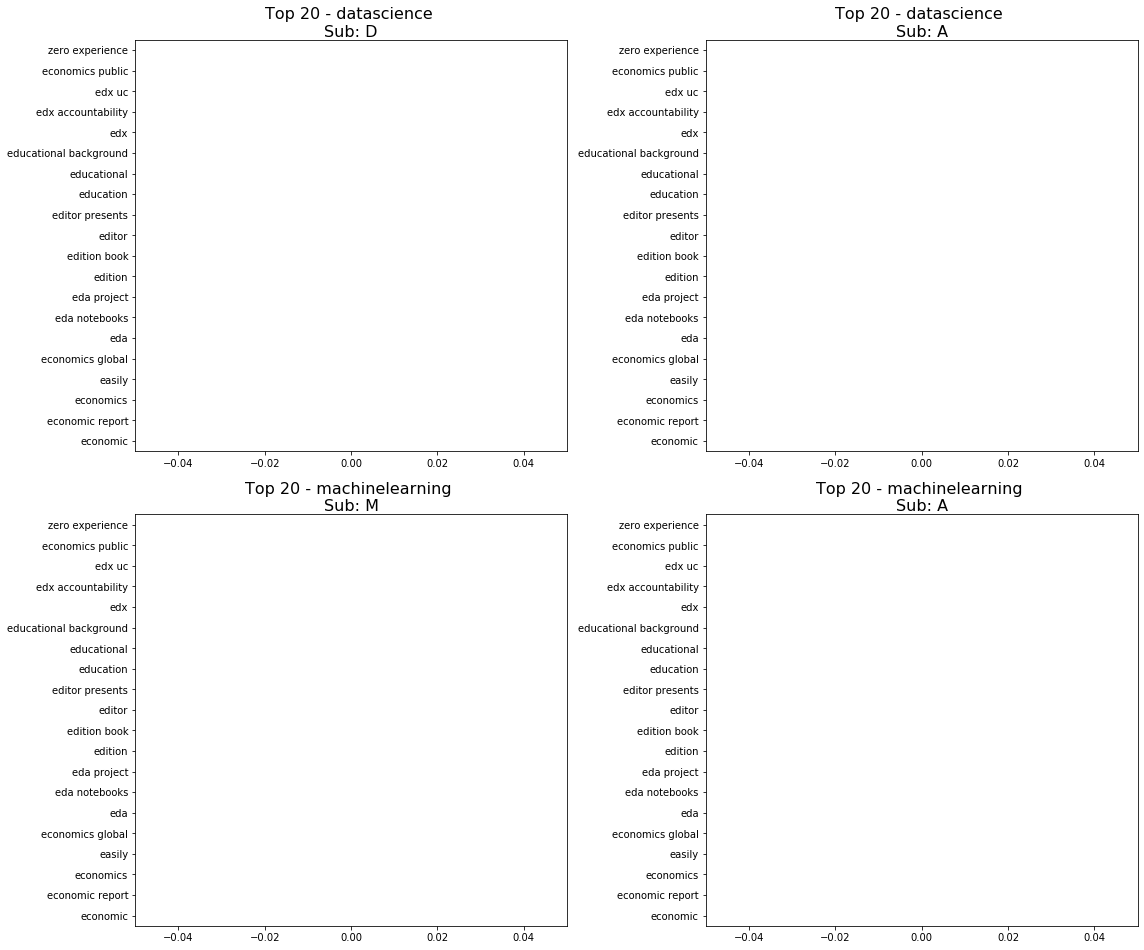

In [122]:
plot_most_common_pairs(df, features_df, pairs)

In [ ]:
most_common = features_df.sum().sort_values(ascending=False).head(20)[::-1]
groups = features_df.groupby(df['subreddit']).sum()[most_common.index].T.head(20)

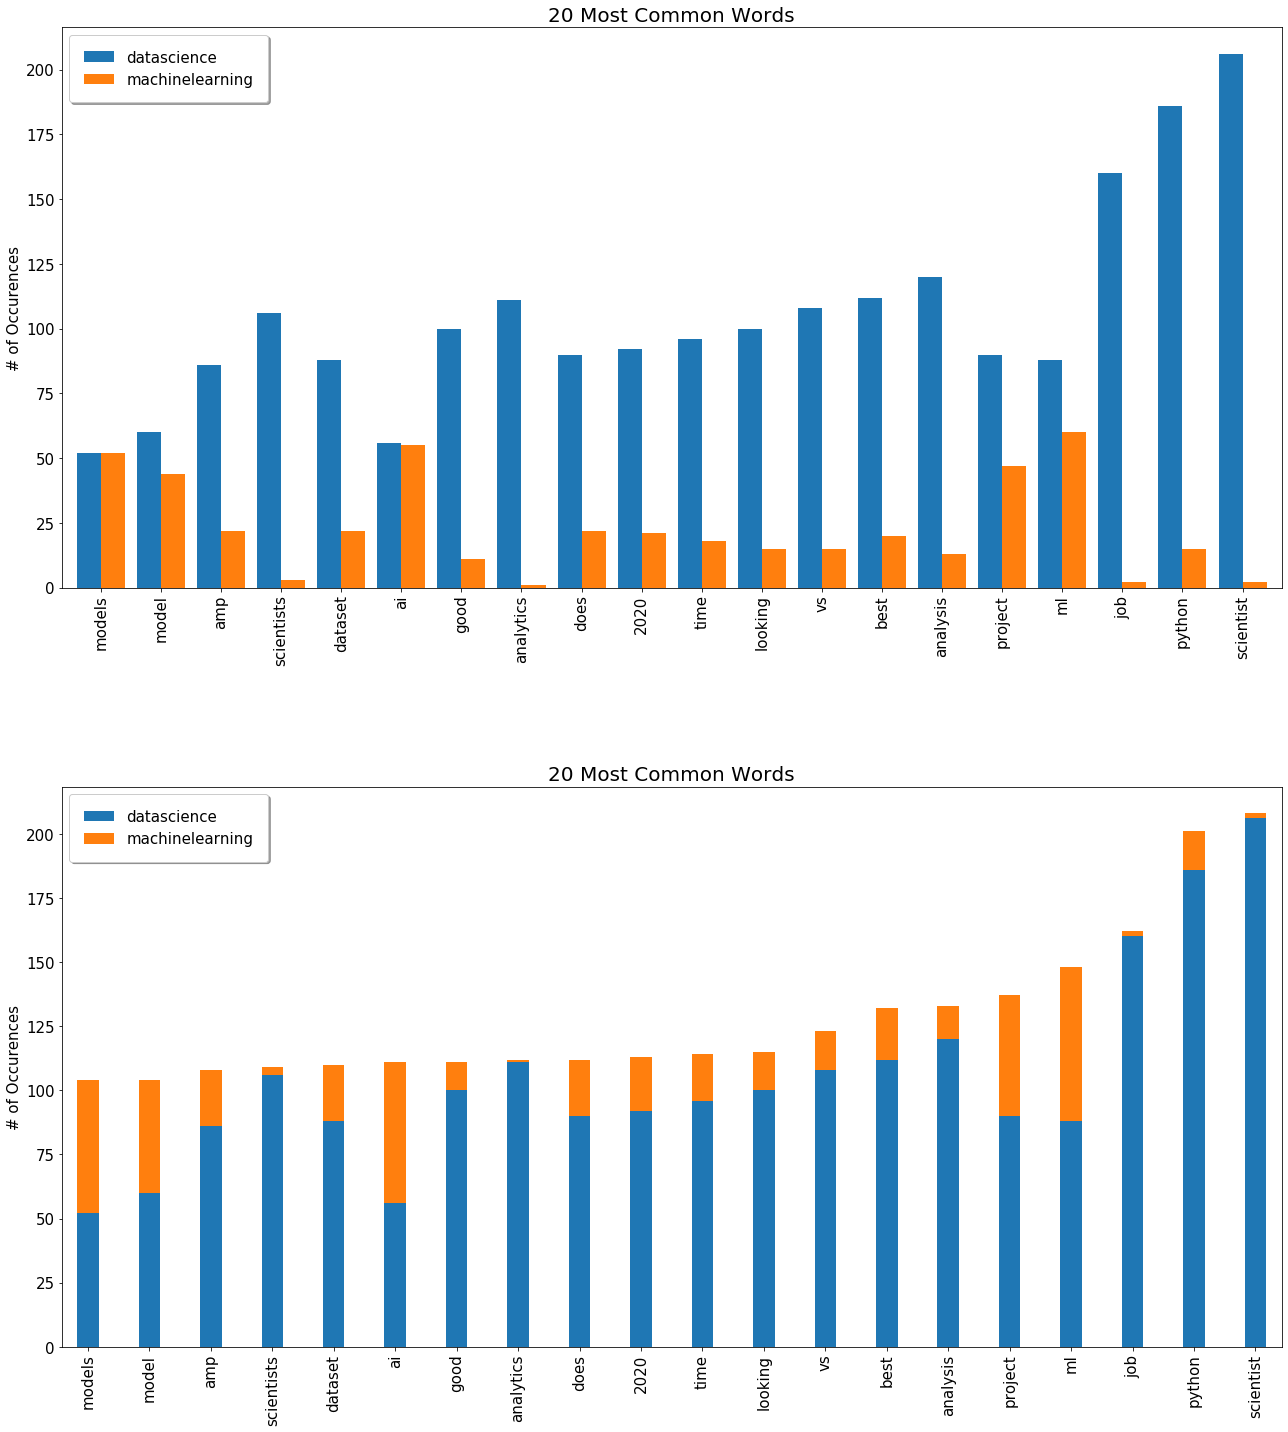

In [138]:
fig, ax = plt.subplots(nrows=2, figsize=(18,20))

groups.plot.bar(ax=ax[0], width=.8, fontsize=15)
ax[0].set_title('20 Most Common Words', fontsize=20)
ax[0].set_ylabel('# of Occurences', fontsize=15)
ax[0].legend(fontsize=15, fancybox=True, framealpha=1, shadow=True, borderpad=1)

groups.plot(kind='bar', ax=ax[1], width=.35, fontsize=15, stacked=True)
ax[1].set_title('20 Most Common Words', fontsize=20)
ax[1].set_ylabel('# of Occurences', fontsize=15)
ax[1].legend(fontsize=15, fancybox=True, framealpha=1, shadow=True, borderpad=1)


plt.tight_layout(h_pad=10);

In [ ]:
### NOTE ### this was copy/pasted from an article.  
# Play with the mask feature and then add it to the function above!
from PIL import Image
mask = np.array(Image.open("jour.jpg")) # Searched "journalism 
                                        # black png" on google 
                                        # images...
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="white", max_words=1000, mask=mask,
               stopwords=stopwords)
# Generate a wordcloud
wc.generate(text)
# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("img/us.png"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(usa)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/us_wine.png", format="png")

plt.show()

In [144]:
def make_cloud(X, height=400, width=700, max_words=50, split=None, labels=None, stopwords=None, colormap='viridis'):
        '''
        Inputs:
        X: text input
        height: height of each wordcloud
        width: width of each wordcloud
        max_words: max words for each wordcloud
        split: if True, wordcloud for each subreddit
        labels: must provide list of labels if split=True, to generate a wordcloud for each label
        stopwords: usually these are the same stopwords used by the tranformer (CountVectorizer or Tfidf)
        '''
        wc = wordcloud.WordCloud(max_words=max_words, 
                                 width=width, 
                                 height=height, 
                                 background_color='white',
                                 colormap=colormap,
                                 stopwords=stopwords
                                )
        if split:
            fig = plt.figure(figsize=(14, 6*len(labels)))
            for i, label in enumerate(labels):
                ax = fig.add_subplot(len(labels),1,i+1)
                cloud = make_cloud(X=df[df['subreddit'] == label]['title'])


                ax.set_title(label.upper(), fontdict={'fontsize': 24})
                ax.imshow(cloud)
                ax.axis('off')

        else:
            cloud = wc.generate(X.str.cat())
            return cloud.to_image()



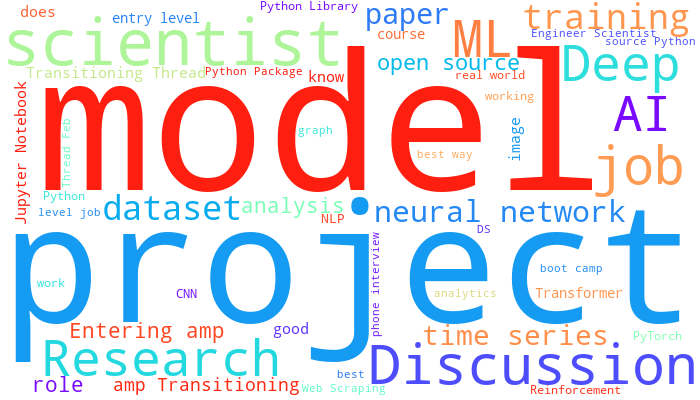

In [146]:
make_cloud(X, stopwords=custom_stop_words, colormap='rainbow')

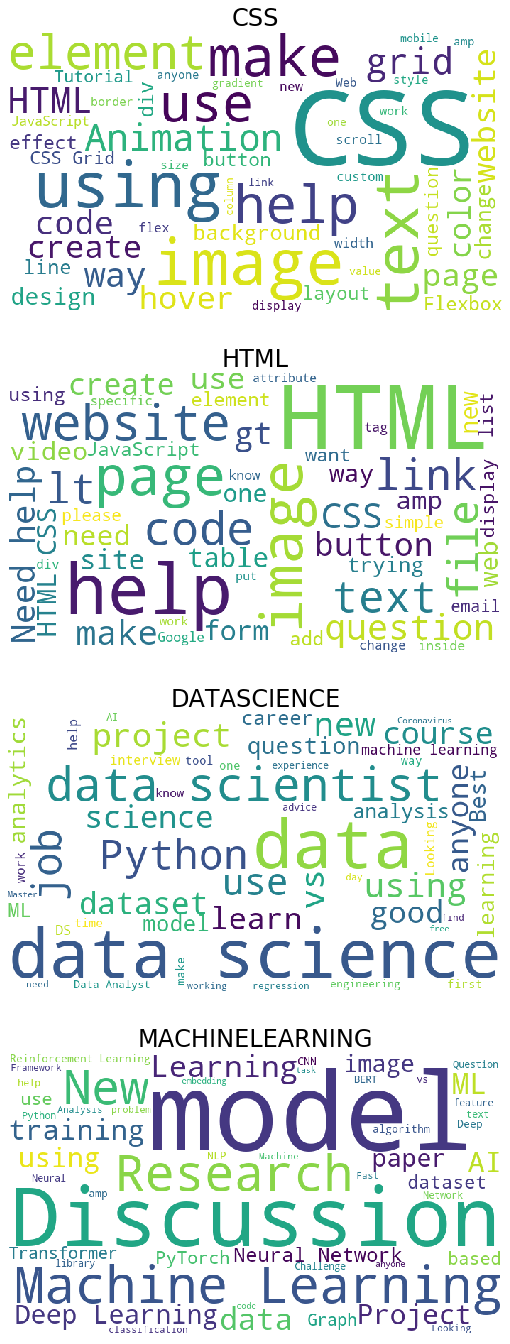

In [47]:
make_cloud(X, split=True, labels=subreddit_list)

## Confusion Matrix

In [48]:
y_pred = model.predict(X_test)

In [49]:
cm = confusion_matrix(y_test, y_pred)

In [50]:
df_cm = pd.DataFrame(cm, columns=subreddit_list, index=subreddit_list)
df_cm

,css,html,datascience,machinelearning
css,143,79,6,15
html,52,154,18,12
datascience,12,48,122,51
machinelearning,5,18,48,163


In [51]:
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

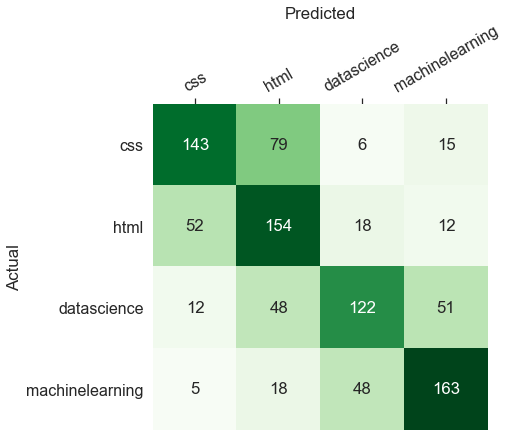

In [56]:
fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.4, )#for label size
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, cmap='Greens', ax=ax)
fontdict={'fontsize': 16}
ax.set_yticklabels(labels=subreddit_list, rotation='horizontal', fontdict=fontdict)
ax.set_xticklabels(labels=subreddit_list, rotation=30, fontdict=fontdict)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

In [60]:
mcm = multilabel_confusion_matrix(y_test, y_pred)
mtn = mcm[:, 0, 0]
mtp = mcm[:, 1, 1]
mfn = mcm[:, 1, 0]
mfp = mcm[:, 0, 1]
print(mcm)

[[[634  69]
  [100 143]]

 [[565 145]
  [ 82 154]]

 [[641  72]
  [111 122]]

 [[634  78]
  [ 71 163]]]


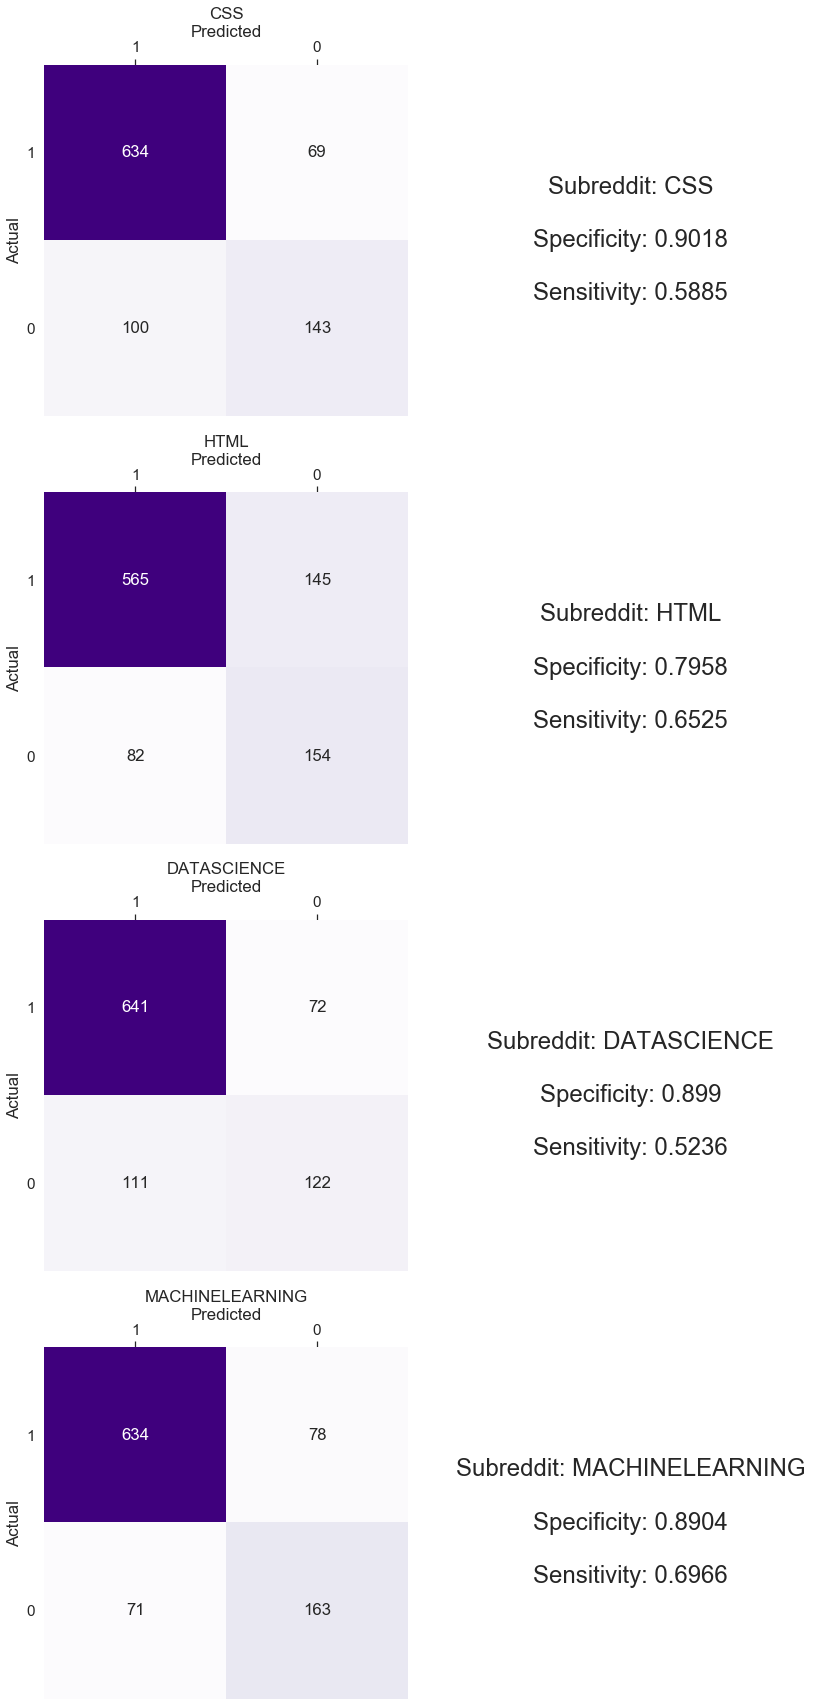

In [61]:
fig, ax = plt.subplots(ncols=2, nrows=len(subreddit_list),
                       figsize=(12, 6*len(subreddit_list)))

for i, cm in enumerate(mcm):
    df_cm = pd.DataFrame(cm)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    sns.heatmap(df_cm, annot=True, fmt="d", cbar=False,
                cmap='Purples', ax=ax[i, 0])

    ax[i, 0].set_yticklabels(labels=[1, 0], rotation='horizontal')
    ax[i, 0].set_xticklabels(labels=[1, 0])
    ax[i, 0].xaxis.tick_top()
    ax[i, 0].xaxis.set_label_position('top')
    ax[i, 0].set_title(subreddit_list[i].upper())

    tn, fp, fn, tp = cm.ravel()
    specif = tn / (tn + fp)

    sens = tp / (tp + fn)
    box_text = f'''Subreddit: {subreddit_list[i].upper()}\n\nSpecificity: {round(specif,4)}\n\nSensitivity: {round(sens,4)}'''
    ax[i, 1].text(0.5, 0.5, box_text, horizontalalignment='center',
                  verticalalignment='center', fontsize=24)
    ax[i, 1].set_axis_off()


plt.tight_layout()

In [62]:
print(classification_report(y_test, y_pred, digits=3, target_names=subreddit_list))

                 precision    recall  f1-score   support

            css      0.675     0.588     0.629       243
           html      0.515     0.653     0.576       236
    datascience      0.629     0.524     0.571       233
machinelearning      0.676     0.697     0.686       234

       accuracy                          0.615       946
      macro avg      0.624     0.615     0.616       946
   weighted avg      0.624     0.615     0.616       946



### ROC AUC Score

<h1>TODO:</h1>

1. Make it have the roc for each sub, have to get into the original df where subname equals indexes?
2. Plot confusion matrix
3. Make a notebook to test the confusion matrixes one by one with each individual model.

In [ ]:
y_test.index

In [ ]:
auc = roc_auc_score(y_test, predictions)
auc

### ROC AUC Curve

In [ ]:
probs = model.predict_proba(X_test)[:,1]

In [ ]:
# not multiclass
fpr, tpr, thresholds = roc_curve(y_test, probs)

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc})', color='r', marker='D')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)', size=16)
plt.ylabel('True Positive Rate (Sensitivity)', size=16)
plt.title('ROC Curve', size=20)
plt.legend(fontsize=14);

# Histograms!

In [ ]:
x1 = np.random.normal(0, 0.8, 1000) x2 = np.random.normal(-2, 1, 1000) x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)
plt.hist(x1, **kwargs) plt.hist(x2, **kwargs) plt.hist(x3, **kwargs);

In [ ]:
# Create figure.
plt.figure(figsize = (10,7))

# Create histogram of observations.
plt.hist(probs, bins=25, color='b')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18);

In [ ]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
hst0 = plt.hist(lr_probs[y_test == 0],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Technology',)

hst1 = plt.hist(lr_probs[y_test == 1],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Science')

# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x=0.5,
           ymin = 0,
           ymax = max(hst1[0].max(), hst0[0].max()), # Max of the two highest respective hist values
           color='r',
           linestyle = '--')

# Label axes.
plt.title('Distribution of P(Science)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability', fontsize=18)

# Create legend.
plt.legend(fontsize=20);

# Thanks to Matt Brems for the colorful graphs! :)